<a href="https://colab.research.google.com/github/insha-amreen/Movie-Review-classification-using-sentiment-analysis-Individual-project/blob/main/MovieReviewClassifier_IndividualProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing all the necessary modules

In [41]:
import pandas as pd
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

loading the dataset

In [42]:
movies= pd.read_csv("/content/IMDBDataset.csv")
movies


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [43]:
movies.shape


(50000, 2)

In [44]:
movies.head(10)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [45]:
movies.tail(10)

,review,sentiment
49990,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative
49991,"Les Visiteurs, the first movie about the medie...",negative
49992,John Garfield plays a Marine who is blinded by...,positive
49993,Robert Colomb has two full-time jobs. He's kno...,negative
49994,This is your typical junk comedy.<br /><br />T...,negative
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [46]:
movies.isnull().sum()

review       0
sentiment    0
dtype: int64

In [47]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


there are no missing values or null values.


In [48]:
movies['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [49]:
movies.replace({'sentiment':{"positive":1,"negative":0}},inplace=True)

In [50]:
movies

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [51]:
sns.set()

<Axes: xlabel='sentiment', ylabel='count'>

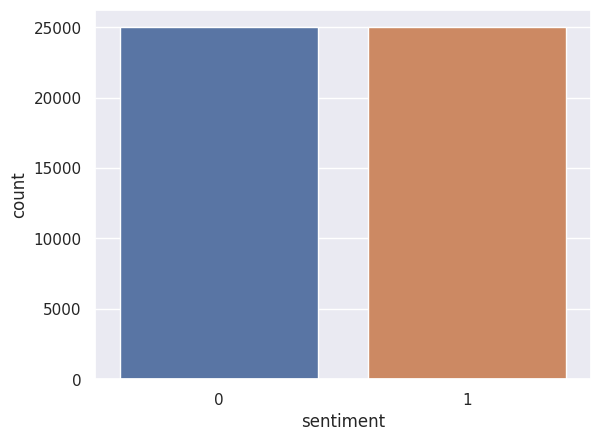

In [52]:
sns.countplot(x='sentiment',data=movies)

Tokenize

Normalise

Stemming

In [53]:
movies.review[1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

We see in the review column that there are some html tags, so we first remove those

In [54]:
def remove_html(text):
  clean=re.compile(r'<.*?>')
  return re.sub(clean,'',text)

movies.review=movies.review.apply(remove_html)
movies.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

now we remove any special characters

In [55]:
def is_special(text):
  sc=re.compile(r'[!,@,#,$,%,^,&,*,<,>,?,+,-,+,{,},(,),=,"",,'',.,]')
  return re.sub(sc,'',text)

movies.review=movies.review.apply(is_special)
movies.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked They are right as this is exactly what happened with meThe first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordIt is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayI would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare Forget pretty pict

In [56]:
movies.review[1]

"A wonderful little production The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece The actors are extremely well chosen- Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams' diary entries not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great master's of comedy and his life The realism really comes home with the little things: the fantasy of the guard which rather than use the traditional 'dream' techniques remains solid then disappears It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets particularly of their flat with Halliwell's murals decorating every surface are terribly well done"

In [57]:
movies.review

0        One of the other reviewers has mentioned that ...
1        A wonderful little production The filming tech...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's Love in the Time of Money is a...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

removing stop words and performing word tokenizing

In [58]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
def stop__words(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    return [w for w in words if w not in stop_words]


movies.review=movies.review.apply(stop__words)
movies.review[1]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['A',
 'wonderful',
 'little',
 'production',
 'The',
 'filming',
 'technique',
 'unassuming-',
 'old-time-BBC',
 'fashion',
 'gives',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'The',
 'actors',
 'extremely',
 'well',
 'chosen-',
 'Michael',
 'Sheen',
 'got',
 'polari',
 'voices',
 'pat',
 'You',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'references',
 'Williams',
 "'",
 'diary',
 'entries',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'A',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 "'s",
 'comedy',
 'life',
 'The',
 'realism',
 'really',
 'comes',
 'home',
 'little',
 'things',
 ':',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 "'dream",
 "'",
 'techniques',
 'remains',
 'solid',
 'disappears',
 'It',
 'plays',
 'knowledge',
 'senses',
 'particularly',
 'scenes',
 'concerning',
 'Orton',
 'Halliwell',
 'sets',
 'particularly',
 'flat',
 'Halliwell',
 "'s",


Lemmatizing

In [59]:
import nltk
nltk.download('wordnet')
def lem(text):
  Lemma = nltk.WordNetLemmatizer()
  return " ".join([Lemma.lemmatize(w) for w in text])


movies.review=movies.review.apply(lem)
movies.review[1]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


"A wonderful little production The filming technique unassuming- old-time-BBC fashion give comforting sometimes discomforting sense realism entire piece The actor extremely well chosen- Michael Sheen got polari voice pat You truly see seamless editing guided reference Williams ' diary entry well worth watching terrificly written performed piece A masterful production one great master 's comedy life The realism really come home little thing : fantasy guard rather use traditional 'dream ' technique remains solid disappears It play knowledge sens particularly scene concerning Orton Halliwell set particularly flat Halliwell 's mural decorating every surface terribly well done"

Create independent variables(X) and dependent variables(y)

In [60]:
X=movies['review']
y=movies['sentiment']


In [61]:
X

0        One reviewer mentioned watching 1 Oz episode '...
1        A wonderful little production The filming tech...
2        I thought wonderful way spend time hot summer ...
3        Basically 's family little boy Jake think 's z...
4        Petter Mattei 's Love Time Money visually stun...
                               ...                        
49995    I thought movie right good job It n't creative...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    I Catholic taught parochial elementary school ...
49998    I 'm going disagree previous comment side Malt...
49999    No one expects Star Trek movie high art fan ex...
Name: review, Length: 50000, dtype: object

In [62]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

transforming the input into a vector to feed it to the machine

In [63]:
cv = TfidfVectorizer(max_features=5000)
X = cv.fit_transform(movies.review).toarray()

In [64]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
X.shape

(50000, 5000)

spiliting the dataset into training and testing

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=5)


Initalizing the model

In [67]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()


Fit the training set into the model

In [68]:
model.fit(X_train, y_train)

GaussianNB()

predict the values

In [69]:
X_train_predict=model.predict(X_train)
X_train_predict

array([1, 0, 0, ..., 1, 0, 0])

In [70]:
X_test_predict=model.predict(X_test)
X_test_predict

array([1, 0, 1, ..., 1, 1, 0])

Accuracy of the model

In [71]:
training_accuracy = accuracy_score(y_train,X_train_predict)
print(f"the accuracy of training data is {training_accuracy*100}")


the accuracy of training data is 83.09333333333333


In [72]:
testing_accuracy=accuracy_score(y_test,X_test_predict)
print(f"the accuracy of testing data is {testing_accuracy*100}")

the accuracy of testing data is 79.765


testing the model

In [73]:
import pickle

In [74]:
pickle.dump(cv, open('movie_review_cv.pkl', 'wb'))
pickle.dump(model, open('movie_review_model.pkl', 'wb'))

In [75]:
save_cv = pickle.load(open('movie_review_cv.pkl', 'rb'))
save_model = pickle.load( open('movie_review_model.pkl', 'rb'))

In [76]:
def test_model(sentence):
    sen = save_cv.transform([sentence]).toarray()
    res = save_model.predict(sen)[0]
    if res == 1:
        print('positive')
    else:
        print('negative')

In [77]:
sentence = ' i love BTS'
test_model(sentence)

positive


In [78]:
senti = 'i hate you '
test_model(senti)

negative


In [79]:
senten = 'what a beautiful movie'
test_model(senten)

positive


In [40]:
sent = input("Please tell us your review: ")
test_model(sent)

Please tell us your review: hate
negative
